In [1]:
import numpy as np
import pandas as pd

# visualization Library/tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# machine learning algorith
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from scipy.stats import randint as sp_randint

In [2]:
train_demo = pd.read_csv('traindemographics.csv')
test_demo = pd.read_csv('testdemographics.csv')

train_prev = pd.read_csv('trainprevloans.csv')
test_prev = pd.read_csv('testprevloans.csv')

train_perf = pd.read_csv('trainperf.csv')
test_perf = pd.read_csv('testperf.csv')

In [3]:
#conversion to datetime
import datetime

# datetime conversion in perf dataset
train_perf['approveddate'] =pd.to_datetime(train_perf['approveddate'])
train_perf['creationdate'] =pd.to_datetime(train_perf['creationdate'])

# datetime conversion in Prev dataset
cols = ['approveddate','creationdate','closeddate', 'firstduedate', 'firstrepaiddate']
for col in cols:
    train_prev[col] = pd.to_datetime(train_prev[col])
    test_prev[col] = pd.to_datetime(test_prev[col])
    
    

In [4]:
shape = train_perf.shape, test_perf.shape
shape

((4368, 10), (1450, 9))

In [5]:
train_perf.isnull().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [6]:
test_perf.isnull().sum()

customerid         0
systemloanid       0
loannumber         0
approveddate       0
creationdate       0
loanamount         0
totaldue           0
termdays           0
referredby      1266
dtype: int64

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['Bad','Good'])

train_perf['good_bad_flag'] = le.transform(train_perf['good_bad_flag'])

In [8]:
#grouping the training set using the 'good_bad_flag'
train_perf.groupby('good_bad_flag').count()

# it shows there are more good than bad loans. 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
good_bad_flag,,,,,,,,,
0,952,952,952,952,952,952,952,952,134
1,3416,3416,3416,3416,3416,3416,3416,3416,453


In [9]:
# from domain knowledge 
#it is advisable to drop 'systemloanid', 'creationdate', 'approveddate', 'refferredby'
# the ratio of missing value in refferedby is far greater than the available onese

train_perf_new = train_perf.drop(['customerid','systemloanid','approveddate','creationdate','referredby'], axis = 1)
test_perf_new = test_perf.drop(['customerid','systemloanid','approveddate','creationdate','referredby'], axis = 1 )

In [10]:
train_perf_new.columns , test_perf_new.columns

(Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag'], dtype='object'),
 Index(['loannumber', 'loanamount', 'totaldue', 'termdays'], dtype='object'))

### Visualizing Corr map

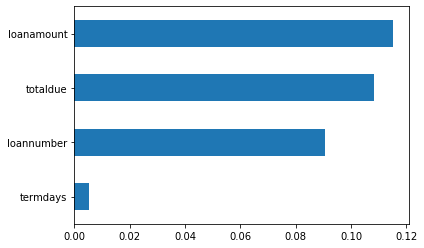

In [11]:
#  Feature importance of the dataset

tst = train_perf_new.corr()['good_bad_flag'].copy()
tst = tst.drop('good_bad_flag')
tst.sort_values(inplace=True)
tst.plot(kind='barh', alpha = 1.)

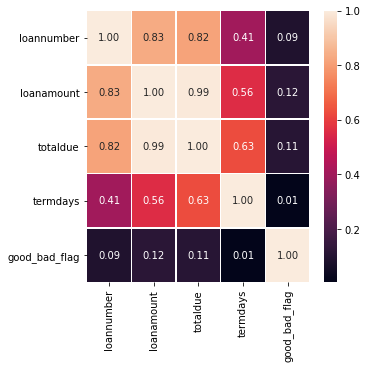

In [12]:
#correlation map
import seaborn as sns
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(train_perf_new.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

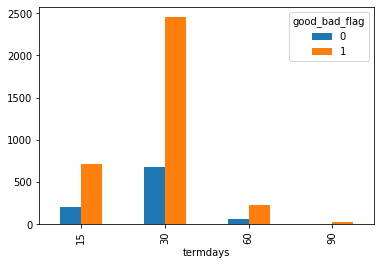

In [13]:
### Visualization with respect to goo_bad_flag
gbf_plot = train_perf.groupby(['termdays','good_bad_flag']).size().unstack(fill_value=0)
gbf_plot.plot.bar()


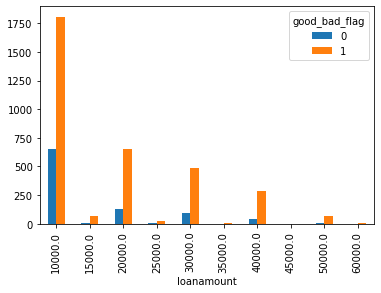

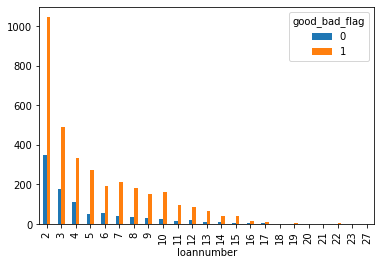

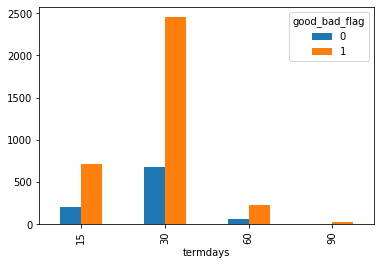

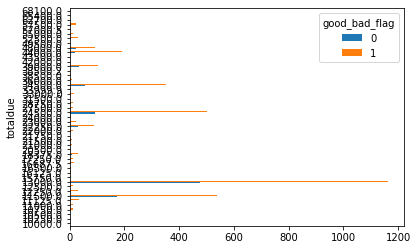

In [14]:
# Visualization and querying column by 'good_bad_flag'
pd.crosstab( train_perf['loanamount'],train_perf['good_bad_flag']).plot.bar()
pd.crosstab( train_perf['loannumber'],train_perf['good_bad_flag']).plot.bar()
pd.crosstab( train_perf['termdays'],train_perf['good_bad_flag']).plot.bar()
pd.crosstab( train_perf['totaldue'],train_perf['good_bad_flag']).plot.barh()


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

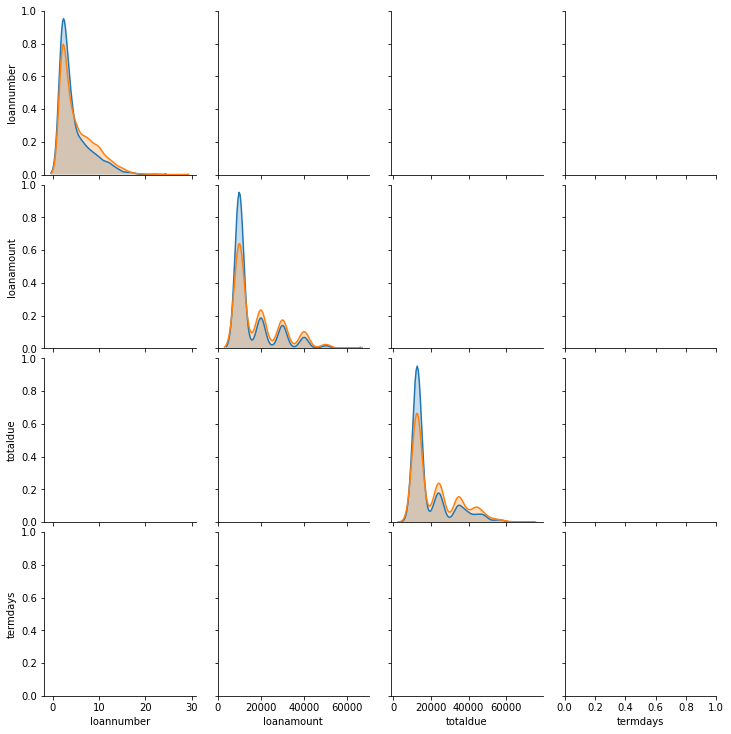

In [15]:
#Visuallizing using PairPlot
sns.pairplot(train_perf_new, hue = 'good_bad_flag' )
plt.show

In [ ]:
# Defining Input and Target

X = train_perf_new.iloc[:,:-1]
y = train_perf_new["good_bad_flag"]

# Defining Test Set

test_x = test_perf_new


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Observing the dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_svm = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Acc_log: %.2f' %acc_log)

acc_met_logreg = round(accuracy_score(y_test, y_pred_svm)*100,2)
print('metrcis_accuracy : %.2f' %acc_met_logreg)

In [ ]:
X = train_perf_new.iloc[:,:-1]
y = train_perf_new["good_bad_flag"]
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

### Support Vector Machines

In [ ]:
# Support Vector Machines
C=1
svc = SVC(C=C,gamma=5)
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
acc_svc = round(svc.score(X, y) * 100, 2)
print('SVC score:', acc_svc)

acc_met_svm = round(accuracy_score(y_test, y_pred_svm)*100,2)
print('metrcis_accuracy : %.2f' %(accuracy_score(y_test, y_pred_svm)*100))
     

### Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print('SGD_score:%.2f', acc_sgd)

acc_met_sgd = round(accuracy_score(y_test, y_pred_sgd)*100,2)
print('metrics_accuracy : %.2f' %acc_met_sgd)

### KNeighborsClassifier

In [ ]:
# Find Best K Value
score_list = []
for each in range(1,50):
    knn_2 = KNeighborsClassifier(n_neighbors = each)
    knn_2.fit(X_train, y_train)
    score_list.append(knn_2.score(X_train,y_train))

plt.plot(range(1,50), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print ('KNN score:%.2f' %acc_knn)

acc_met_knn = round(accuracy_score(y_test, y_pred_knn)*100,2)

print('metrcis_accuracy : %.2f' %acc_met_knn)

### XGBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb =round(xgb.score(X_train,y_train)*100, 2)
print ('XGB score:%.2f' %acc_xgb)

acc_met_xgb = round(accuracy_score(y_test, y_pred_xgb)*100,2)

print('metrcis_accuracy : %.2f' %acc_met_xgb)

### DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {'criterion' : ('gini', 'entropy'),
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 100), 
              'min_samples_leaf': sp_randint(1, 100)}



rand_dt = RandomizedSearchCV(dt_clf, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
dec = rand_dt.fit(X_train,y_train)
rand_dt.best_params_

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier(
    random_state=42, criterion= 'gini', max_features = 'auto',
    min_samples_leaf = 83, min_samples_split =88)

decision_tree.fit(X_train, y_train)
y_pred_dtc = dec.predict(X_test)
acc_dtc = round(dec.score(X_train, y_train) * 100, 2)
print ('DTC Acc:%.2f' %acc_dtc)

acc_met_dtc = round(accuracy_score(y_test, y_pred_dtc)*100,2)
print('metrcis_accuracy : %.2f' %acc_met_dtc)

### Random Forest

In [ ]:
# Fitting Random Forest Classification to the Training set
rfc = RandomForestClassifier(random_state = 42)

param_grid = {'criterion' : ('gini', 'entropy'),
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 20), 
              'min_samples_leaf': sp_randint(1, 20)}


randser = RandomizedSearchCV(rfc, param_grid, cv=5, scoring="accuracy", n_iter=20)
dec = randser.fit(X_train,y_train)
randser.best_params_


In [ ]:
rfc = RandomForestClassifier(random_state=42, criterion = 'entropy', 
                             max_features = 'auto', min_samples_leaf= 18, min_samples_split= 17 )
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train, y_train)*100, 2)
print ('RFC Acc: %.2f' %acc_rfc)

acc_met_rfc = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('metrcis_accuracy : %.2f' %(accuracy_score(y_test, y_pred_rfc)*100))

### LinearDiscriminantAnalysis

In [ ]:
lda =LinearDiscriminantAnalysis(solver= 'svd')
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
acc_lda = round(lda.score(X_train, y_train)*100, 2)
print ('RFC Acc: %.2f' %acc_lda)

acc_met_lda = round(accuracy_score(y_test, y_pred_lda)*100,2)
print('metris_accuracy : %.2f' %acc_met_lda)

In [ ]:
# Tabularization of all models

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'SGD', 
              'KNN', 'XGB', 'Decision_Tree', 
              'Random_Forest', 'Linear_Discriminant'],
    
    'Score': [acc_met_logreg, acc_met_svm, acc_met_sgd, 
              acc_met_knn,acc_met_xgb, acc_met_dtc, 
              acc_met_rfc, acc_met_lda]
            })

models.sort_values(by='Score', ascending=False)

In [ ]:
test_pred = rfc.predict(test_x) #predict on the test set for submission

In [ ]:
#
submission = pd.DataFrame({'customerid': test_perf['customerid'], 'Good_Bad_flag': test_pred})
submission = submission[['customerid', 'Good_Bad_flag']]

In [ ]:
sub.isnull().count()

In [ ]:
s